# Econ simulation textbook

## WWI

Connect to SQL server & WWI database

In [10]:
import pyodbc
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
driver = 'ODBC Driver 18 for SQL Server' 
server = 'localhost' 
database = 'WideWorldImporters' 
username = 'SA' 
password = 'xxxx'

connection_string = 'DRIVER={ODBC Driver 18 for SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=yes;UID='+username+';PWD='+ password+';TrustServerCertificate=yes'

# ENCRYPT defaults to yes starting in ODBC Driver 18. It's good to always specify ENCRYPT=yes on the client side to avoid MITM attacks.
cnxn = pyodbc.connect(connection_string)
print(cnxn)


In [13]:
cursor = cnxn.cursor()

In [14]:
top_10 = """
SELECT TOP (10) [CityID]
      ,[CityName]
      ,[StateProvinceID]
      ,[LatestRecordedPopulation]
      ,[LastEditedBy]
      ,[ValidFrom]
      ,[ValidTo]
  FROM [WideWorldImporters].[Application].[Cities]
"""
thetop = cursor.execute(top_10) 
print(thetop)


In [16]:
cursor.execute(top_10) 
row = cursor.fetchone() 
from pandas import DataFrame
df = DataFrame(cursor.fetchall())
while row: 
    print(row)
    row = cursor.fetchone() 
print("this is pd")
print(df)

(1, 'Aaronsburg', 39, 613, 1, datetime.datetime(2013, 1, 1, 0, 0), datetime.datetime(9999, 12, 31, 23, 59, 59, 999999))
this is pd
                                                   0
0  [3, Abanda, 1, 192, 1, 2013-01-01 00:00:00, 99...
1  [4, Abbeville, 42, 5237, 1, 2013-01-01 00:00:0...
2  [5, Abbeville, 11, 2908, 1, 2013-01-01 00:00:0...
3  [6, Abbeville, 1, 2688, 1, 2013-01-01 00:00:00...
4  [7, Abbeville, 19, 12257, 1, 2013-01-01 00:00:...
5  [8, Abbeville, 25, 419, 1, 2013-01-01 00:00:00...
6  [9, Abbotsford, 52, 2310, 1, 2013-01-01 00:00:...
7  [10, Abbott, 45, 356, 1, 2013-01-01 00:00:00, ...
8  [11, Abbott, 4, 356, 1, 2013-01-01 00:00:00, 9...


##### Data simulation WWI

In [18]:
import datetime

def addStockItems(current_date_time):
    cursor.execute("SET NOCOUNT ON;")
    cursor.execute("SET XACT_ABORT ON;")
    try:
        cursor.execute("SET NOCOUNT ON;")
        cursor.execute("SET XACT_ABORT ON;")
        
        number_of_stock_items = 0
        
        if current_date_time.date() == datetime.datetime(2016, 1, 1):
            number_of_stock_items = 2
            
            cursor.execute("BEGIN TRAN;")
            
            insert_query = """
            INSERT INTO Warehouse.StockItems (StockItemID, StockItemName, SupplierID, ColorID, UnitPackageID, OuterPackageID, Brand, Size, LeadTimeDays, QuantityPerOuter, IsChillerStock, Barcode, TaxRate, UnitPrice, RecommendedRetailPrice, TypicalWeightPerUnit, MarketingComments, InternalComments, Photo, CustomFields, LastEditedBy, ValidFrom, ValidTo)
            VALUES (?, ?, (SELECT SupplierID FROM Purchasing.Suppliers WHERE SupplierName = ?), (SELECT ColorID FROM Warehouse.Colors WHERE ColorName = ?), (SELECT PackageTypeID FROM Warehouse.PackageTypes WHERE PackageTypeName = ?), (SELECT PackageTypeID FROM Warehouse.PackageTypes WHERE PackageTypeName = ?), ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """
            
            params = [
                (220, 'Novelty chilli chocolates 250g', 'A Datum Corporation', 'NULL', 'Bag', 'Carton', None, '250g', 3, 24, 1, '8302039293929', 10, 8.55, 12.23, 0.25, 'Watch your friends faces when they eat these', None, None, None, 1, current_date_time, end_of_time),
                (221, 'Novelty chilli chocolates 500g', 'A Datum Corporation', 'NULL', 'Bag', 'Carton', None, '500g', 3, 12, 1, '8302039293647', 10, 14.5, 20.74, 0.5, 'Watch your friends faces when they eat these', None, None, None, 1, current_date_time, end_of_time)
            ]
            
            cursor.executemany(insert_query, params)
            # cnxn.commit()
    except Exception as e:
        cnxn.rollback()
        raise e

    finally:
        cursor.close()

In [ ]:
mydate = datetime.datetime(2009,5,5)

## Market simulation

### Interest rate in PYMC

rates sigma


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


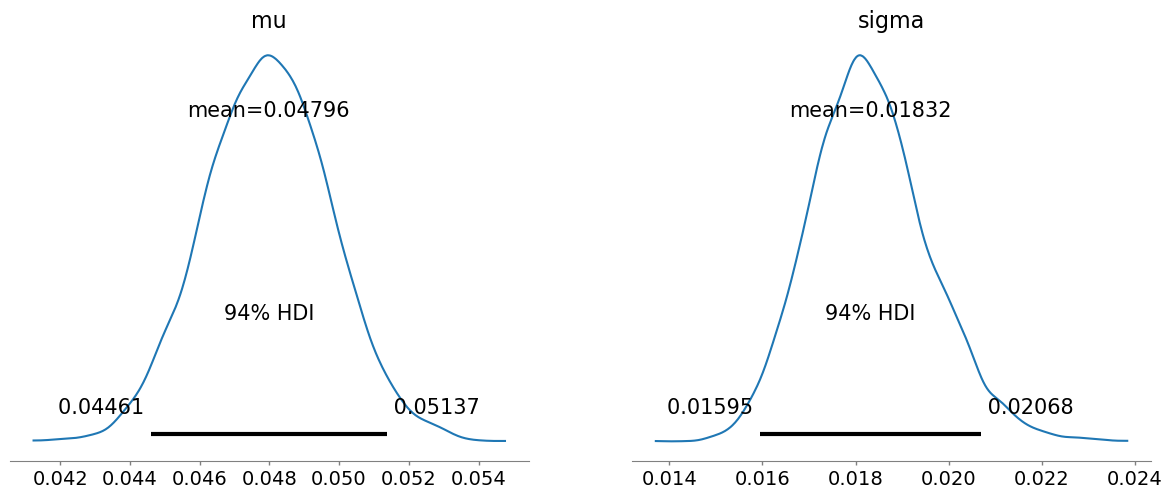

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plts

# Simulated data parameters
num_years = 100
interest_mean = 0.05  # Mean interest rate
interest_stddev = 0.02  # Standard deviation of interest rates

# Simulate data
np.random.seed(42)
simulated_interest_rates = np.random.normal(loc=interest_mean, scale=interest_stddev, size=num_years)

# Pymc model
with pm.Model() as model:
    # Prior distribution for the mean interest rate
    mu = pm.Normal("mu", mu=0.05, sigma=0.02)

    # Prior distribution for the standard deviation
    sigma = pm.HalfNormal("sigma", sigma=0.02)

    # Likelihood function (assuming interest rates follow a normal distribution)
    rates = pm.Normal("rates", mu=mu, sigma=sigma, observed=simulated_interest_rates)
    print(rates, sigma)

    # Sample from the posterior distribution
    trace = pm.sample(2000, tune=1000)

# Plot the results
pm.plot_posterior(trace, var_names=["mu", "sigma"], round_to=4)
plts.show()


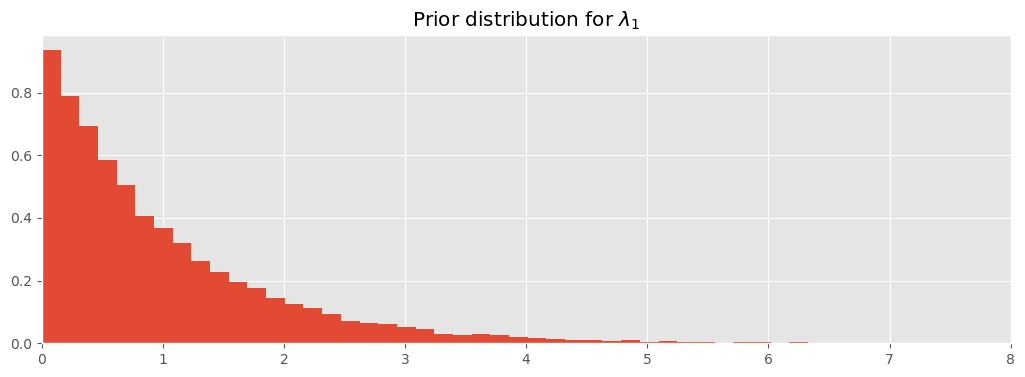

In [24]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1.0,initval=0.5)
    lambda_2 = pm.Exponential("lambda_2", 1.0,initval=0.5)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

new_deterministic_variable = lambda_1 + lambda_2

import numpy as np

n_data_points = 5  # in CH1 we had ~70 data points
idx = np.arange(n_data_points)
with model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)
plt.style.use("ggplot")
samples = pm.draw(lambda_1, draws=20000)
plt.hist(samples, bins=70, density=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);